In [8]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('US_Videos_Dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,description,is_trending
0,G4M_621v1As,college farewell video#trending #viralshorts,2025-04-12T02:06:42Z,UC7k_7IF3s3TY-cowwxs_yWw,Vk_07_rider,22.0,2025-11-08,"college farewell video, DDU farewell video, fa...",125784084.0,1557178.0,1583.0,https://i.ytimg.com/vi/G4M_621v1As/default.jpg,0,DDU farewell party video \n college farewell v...,1
1,z2voqo_Jhx4,Busking in Manchester 🇬🇧 #blindfaith #guitar #...,2025-04-06T11:35:53Z,UCM_9JHB3xXPSzJfTkD86AtA,Leonardo Patrick,10.0,2025-11-08,NaN,94744011.0,925529.0,5849.0,https://i.ytimg.com/vi/z2voqo_Jhx4/default.jpg,0,NaN,1
2,jHIt9oHFLsw,This is what happens when you play Star Wars i...,2025-04-06T10:07:12Z,UC4YyKY5o60Kckk-GXOnhT2g,Violin Phonix,22.0,2025-11-08,NaN,61945818.0,1067412.0,4124.0,https://i.ytimg.com/vi/jHIt9oHFLsw/default.jpg,0,Full video : https://www.youtube.com/watch?v=Q...,1
3,gwRqLbWqKlM,LISA - FUTW (YouTube Music Nights Special Stag...,2025-03-19T03:29:33Z,UC6-BgjsBa5R3PZQ_kZ8hKPg,LLOUD Official,10.0,2025-11-08,"Blackpink, Lisa, Music, Fashion, K-Pop, kpop, ...",14555963.0,455816.0,20396.0,https://i.ytimg.com/vi/gwRqLbWqKlM/default.jpg,0,"LISA’s debut album, ‘Alter Ego’ is out now. Li...",1
4,prpRoyrutcE,Uljhi hai yeh kis jaal me tu…. Bengaluru ❤️,2025-04-14T10:17:58Z,UCiFXnvi8ESDukE25ol2foWQ,Mr.KiranJ,10.0,2025-11-08,NaN,26204942.0,336267.0,2333.0,https://i.ytimg.com/vi/prpRoyrutcE/default.jpg,0,NaN,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395915 entries, 0 to 395914
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           395915 non-null  object 
 1   title              395915 non-null  object 
 2   publishedAt        390064 non-null  object 
 3   channelId          395915 non-null  object 
 4   channelTitle       395911 non-null  object 
 5   categoryId         395898 non-null  float64
 6   trending_date      177532 non-null  object 
 7   tags               272004 non-null  object 
 8   view_count         395898 non-null  float64
 9   likes              395898 non-null  float64
 10  comment_count      395898 non-null  float64
 11  thumbnail_link     395915 non-null  object 
 12  comments_disabled  395915 non-null  int64  
 13  description        334405 non-null  object 
 14  is_trending        395915 non-null  int64  
dtypes: float64(4), int64(2), object(9)
m

In [9]:
import sys
!{sys.executable} -m pip install seaborn pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Data Cleaning & Feature Selection

cols_to_drop = ['video_id', 'title', 'publishedAt', 'channelId',
                'channelTitle', 'tags', 'thumbnail_link',
                'description', 'trending_date']

df_clean = df.drop(columns=cols_to_drop, errors='ignore')

df_clean.dropna(inplace=True)

print(f"Data shape after cleaning: {df_clean.shape}")

X = df_clean.drop(columns=['is_trending'])
y = df_clean['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Unique Step): Feature Selection

print("\nPerforming Feature Selection (SelectKBest)...")

selector = SelectKBest(score_func=f_classif, k=4)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Original Features:", list(X.columns))
print("Selected Best Features:", list(selected_features))

Data shape after cleaning: (395898, 6)

Performing Feature Selection (SelectKBest)...
Original Features: ['categoryId', 'view_count', 'likes', 'comment_count', 'comments_disabled']
Selected Best Features: ['categoryId', 'view_count', 'comment_count', 'comments_disabled']


--- Round 1: Using ALL Features ---
Training GaussianNB on All Features...
Training SGDClassifier on All Features...

--- Round 2: Using SELECTED Features ---
Training GaussianNB on Selected Features...
Training SGDClassifier on Selected Features...

FINAL COMPARISON TABLE
            Model                   Data  Accuracy
0     Naive Bayes  All Features (5 cols)  0.580778
1  SGD Classifier  All Features (5 cols)  0.546918
2     Naive Bayes      Selected (4 cols)  0.567189
3  SGD Classifier      Selected (4 cols)  0.748472


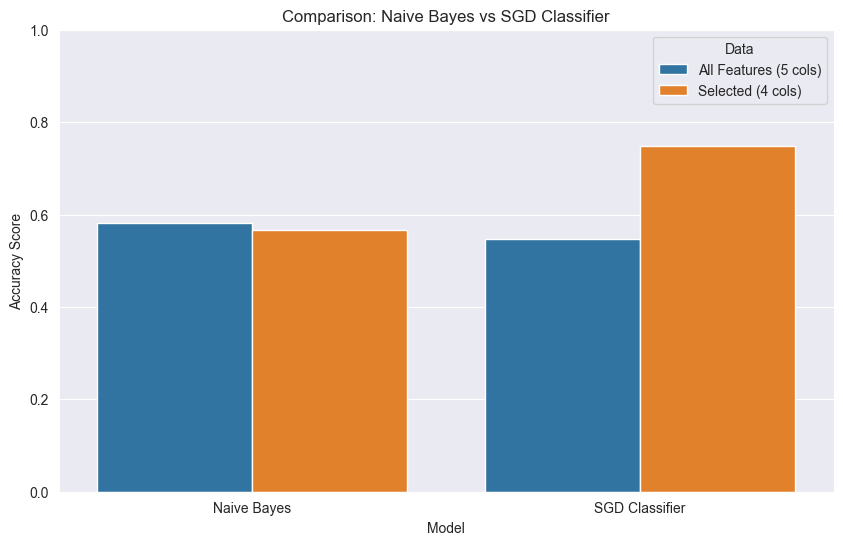

In [12]:
# Model Training with NEW Models (Naive Bayes & SGD)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

def train_and_evaluate(model, X_train_data, X_test_data, y_train_data, y_test_data, dataset_name):
    print(f"Training {model.__class__.__name__} on {dataset_name}...")
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    acc = accuracy_score(y_test_data, y_pred)
    return acc


model_nb = GaussianNB()
model_sgd = SGDClassifier(max_iter=1000, random_state=42)
results = []

#  (All Features)
print("--- Round 1: Using ALL Features ---")

# Naive Bayes
acc_nb_all = train_and_evaluate(model_nb, X_train, X_test, y_train, y_test, "All Features")
results.append({"Model": "Naive Bayes", "Data": "All Features (5 cols)", "Accuracy": acc_nb_all})

# SGD Classifier
acc_sgd_all = train_and_evaluate(model_sgd, X_train, X_test, y_train, y_test, "All Features")
results.append({"Model": "SGD Classifier", "Data": "All Features (5 cols)", "Accuracy": acc_sgd_all})

# (Selected Features)
print("\n--- Round 2: Using SELECTED Features ---")

# Naive Bayes
acc_nb_sel = train_and_evaluate(model_nb, X_train_selected, X_test_selected, y_train, y_test, "Selected Features")
results.append({"Model": "Naive Bayes", "Data": "Selected (4 cols)", "Accuracy": acc_nb_sel})

# SGD Classifier
acc_sgd_sel = train_and_evaluate(model_sgd, X_train_selected, X_test_selected, y_train, y_test, "Selected Features")
results.append({"Model": "SGD Classifier", "Data": "Selected (4 cols)", "Accuracy": acc_sgd_sel})


results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("FINAL COMPARISON TABLE")
print("="*40)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Data")
plt.title("Comparison: Naive Bayes vs SGD Classifier")
plt.ylim(0.0, 1.0)
plt.ylabel("Accuracy Score")
plt.show()

Processing Data...
Data is ready! Starting advanced training...

Training Random Forest (Ensemble)...
 Random Forest (Ensemble) Accuracy: 0.8931
Training Neural Network (Deep Learning)...
 Neural Network (Deep Learning) Accuracy: 0.8646

 FINAL PROJECT RESULTS 🏆
                  Model           Type  Accuracy
0         Random Forest       Ensemble  0.893066
1  Neural Network (MLP)  Deep Learning  0.864625


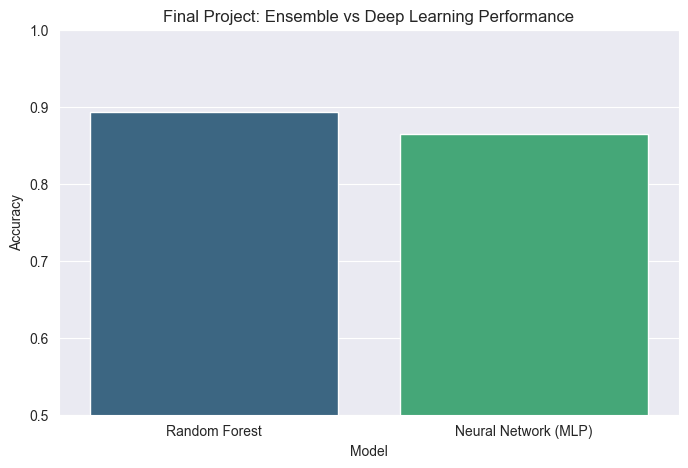


Best Performing Model: Random Forest


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('US_Videos_Dataset.csv')

cols_to_drop = ['video_id', 'title', 'publishedAt', 'channelId',
                'channelTitle', 'tags', 'thumbnail_link',
                'description', 'trending_date']
df_clean = df.drop(columns=cols_to_drop, errors='ignore')
df_clean.dropna(inplace=True)

X = df_clean.drop(columns=['is_trending'])
y = df_clean['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Processing Data...")

selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("Data is ready! Starting advanced training...\n")


def train_advanced_model(model, name):
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f" {name} Accuracy: {acc:.4f}")
    return acc, y_pred

results_final = []

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
acc_rf, pred_rf = train_advanced_model(rf_model, "Random Forest (Ensemble)")
results_final.append({"Model": "Random Forest", "Type": "Ensemble", "Accuracy": acc_rf})

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', random_state=42)
acc_mlp, pred_mlp = train_advanced_model(mlp_model, "Neural Network (Deep Learning)")
results_final.append({"Model": "Neural Network (MLP)", "Type": "Deep Learning", "Accuracy": acc_mlp})

results_df = pd.DataFrame(results_final)

print(" ----- FINAL PROJECT RESULTS -----")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Final Project: Ensemble vs Deep Learning Performance")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()

best_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
print(f"\nBest Performing Model: {best_model_name}")

In [33]:
def predict_new_video():
    print(" ----- VIDEO TREND PREDICTOR ----- ")
    print("Please enter the video details below:\n")

    try:
        views = float(input("1. Enter View Count (e.g., 5000): "))
        comments = float(input("2. Enter Comment Count (e.g., 400): "))

        print("\nCommon Category IDs: 10=Music, 20=Gaming, 17=Sports, 24=Entertainment")
        cat_id = float(input("3. Enter Category ID (e.g., 10,17,20,24): "))

        disabled_input = input("4. Are comments disabled? (yes/no): ").lower()
        disabled = 1 if disabled_input in ['yes', 'y', '1'] else 0

        if views > 0:
            engagement_rate = (comments / views) * 100
        else:
            engagement_rate = 0

        new_data = pd.DataFrame([[cat_id, views, comments, disabled]],
                                columns=['categoryId', 'view_count', 'comment_count', 'comments_disabled'])

        new_data_scaled = scaler.transform(new_data)

        prob_rf = rf_model.predict_proba(new_data_scaled)[0][1]
        prob_mlp = mlp_model.predict_proba(new_data_scaled)[0][1]

        print("ANALYSIS REPORT")
        print("-" * 40)

        print(f" Engagement Rate: {engagement_rate:.2f}%")
        if engagement_rate > 5.0:
            print("   ( Insight: Extremely high interaction!)")
        elif engagement_rate > 2.0:
            print("   ( Insight: Good/Healthy interaction.)")
        else:
            print("   ( Insight: Low interaction relative to views.)")

        print("-" * 40)

        print(f" Random Forest Probability:  {prob_rf*100:.2f}%")
        print(f" Deep Learning Probability:  {prob_mlp*100:.2f}%")

        print("\nAI FINAL VERDICT:")

        if prob_rf > 0.5 and prob_mlp > 0.5:
            print("SUPER TRENDING! Both models agree significantly.")
            print("Confidence: VERY HIGH")

        elif (prob_rf > 0.5 and prob_mlp < 0.5) or (prob_rf < 0.5 and prob_mlp > 0.5):
            print(" MIXED SIGNALS (Controversial).")
            print(" The models disagree. The video might have unusual patterns.")
            if engagement_rate > 3.0:
                print(" TIP: Trust the Engagement Rate. It's likely a hidden hit.")
            else:
                print(" TIP: Likely not trending yet.")

        elif engagement_rate > 3.0:
            print("HIDDEN GEM DETECTED!")
            print("Models see low views, BUT the high engagement indicates")
            print("this video has huge viral potential soon.")

        else:
            print("NOT TRENDING.")
            print("Low probability and low engagement.")

    except ValueError:
        print("Error: Please enter valid numbers!")

while True:
    predict_new_video()
    cont = input("\nDo you want to test another video? (yes/no): ")
    if cont.lower() != 'yes':
        print("Goodbye!")
        break

 ----- VIDEO TREND PREDICTOR ----- 
Please enter the video details below:



KeyboardInterrupt: Interrupted by user

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('US_Videos_Dataset.csv')

cols_to_drop_text = ['video_id', 'title', 'publishedAt', 'channelId',
                     'channelTitle', 'tags', 'thumbnail_link',
                     'description', 'trending_date']
df_clean = df.drop(columns=cols_to_drop_text, errors='ignore')
df_clean.dropna(inplace=True)

y = df_clean['is_trending']

print("  Testing BEFORE Feature Selection (All Features)...")
X_all = df_clean.drop(columns=['is_trending'])
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

scaler_all = StandardScaler()
X_train_all_sc = scaler_all.fit_transform(X_train_all)
X_test_all_sc = scaler_all.transform(X_test_all)

rf_all = RandomForestClassifier(n_estimators=50, random_state=42)
rf_all.fit(X_train_all_sc, y_train_all)
acc_rf_before = accuracy_score(y_test_all, rf_all.predict(X_test_all_sc))

mlp_all = MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=42)
mlp_all.fit(X_train_all_sc, y_train_all)
acc_mlp_before = accuracy_score(y_test_all, mlp_all.predict(X_test_all_sc))

print(f"   Done. (RF: {acc_rf_before:.2%}, MLP: {acc_mlp_before:.2%})")

print("\n  Testing AFTER Feature Selection (Selected Features)...")
selected_features = ['view_count', 'comment_count', 'categoryId', 'comments_disabled']
X_sel = df_clean[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)

scaler_sel = StandardScaler()
X_train_sel_sc = scaler_sel.fit_transform(X_train_sel)
X_test_sel_sc = scaler_sel.transform(X_test_sel)

rf_sel = RandomForestClassifier(n_estimators=50, random_state=42)
rf_sel.fit(X_train_sel_sc, y_train_sel)
acc_rf_after = accuracy_score(y_test_sel, rf_sel.predict(X_test_sel_sc))

mlp_sel = MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=42)
mlp_sel.fit(X_train_sel_sc, y_train_sel)
acc_mlp_after = accuracy_score(y_test_sel, mlp_sel.predict(X_test_sel_sc))

print(f"   Done. (RF: {acc_rf_after:.2%}, MLP: {acc_mlp_after:.2%})")

print(" ----- IMPACT OF FEATURE SELECTION REPORT -----")
results = pd.DataFrame({
    'Model': ['Random Forest', 'Deep Learning (MLP)'],
    'Accuracy BEFORE (All Data)': [acc_rf_before, acc_mlp_before],
    'Accuracy AFTER (Selection)': [acc_rf_after, acc_mlp_after],
    'Improvement': [acc_rf_after - acc_rf_before, acc_mlp_after - acc_mlp_before]
})

results['Accuracy BEFORE (All Data)'] = results['Accuracy BEFORE (All Data)'].map('{:.2%}'.format)
results['Accuracy AFTER (Selection)'] = results['Accuracy AFTER (Selection)'].map('{:.2%}'.format)
results['Improvement'] = results['Improvement'].map('{:+.2%}'.format)

print(results)

  Testing BEFORE Feature Selection (All Features)...
   Done. (RF: 92.34%, MLP: 85.80%)

  Testing AFTER Feature Selection (Selected Features)...
   Done. (RF: 89.32%, MLP: 85.67%)
 ----- IMPACT OF FEATURE SELECTION REPORT -----
                 Model Accuracy BEFORE (All Data) Accuracy AFTER (Selection)  \
0        Random Forest                     92.34%                     89.32%   
1  Deep Learning (MLP)                     85.80%                     85.67%   

  Improvement  
0      -3.03%  
1      -0.14%  
